<a href="https://colab.research.google.com/github/ybeth-gonzaga/Taylor-Swift-Spotify-Analysis/blob/main/02_eda_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Import File
df = pd.read_csv("https://raw.githubusercontent.com/ybeth-gonzaga/Taylor-Swift-Spotify-Analysis/main/ph_spotify_daily_charts_ts_summary.csv")
df.head()

,Unnamed: 0,date,total_streams,stream_percent_change,total_count,count_percent_change,highest_rank,top_rank_diff
0,0,2017-01-01,0,0.0,0,0.0,NaN,0.0
1,1,2017-01-02,0,0.0,0,0.0,NaN,0.0
2,2,2017-01-03,0,0.0,0,0.0,NaN,0.0
3,3,2017-01-04,0,0.0,0,0.0,NaN,0.0
4,4,2017-01-05,0,0.0,0,0.0,NaN,0.0


# Initial Check of Dataframe

In [4]:
# Number of rows and columns
df.shape

(2479, 8)

In [5]:
# Get the name of the columns
df.keys()

Index(['Unnamed: 0', 'date', 'total_streams', 'stream_percent_change',
       'total_count', 'count_percent_change', 'highest_rank', 'top_rank_diff'],
      dtype='object')

In [6]:
# Check the basic info of the values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2479 non-null   int64  
 1   date                   2479 non-null   object 
 2   total_streams          2479 non-null   int64  
 3   stream_percent_change  2479 non-null   float64
 4   total_count            2479 non-null   int64  
 5   count_percent_change   2479 non-null   float64
 6   highest_rank           1976 non-null   float64
 7   top_rank_diff          2479 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 155.1+ KB


In [7]:
# Convert data type of date to date
df['date_time'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2479 non-null   int64         
 1   date                   2479 non-null   object        
 2   total_streams          2479 non-null   int64         
 3   stream_percent_change  2479 non-null   float64       
 4   total_count            2479 non-null   int64         
 5   count_percent_change   2479 non-null   float64       
 6   highest_rank           1976 non-null   float64       
 7   top_rank_diff          2479 non-null   float64       
 8   date_time              2479 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 174.4+ KB


# Initial Data Analysis

In [8]:
# Getting the date range
print('The data ranges from',df['date'].min(),'to',df['date'].max())

The data ranges from 2017-01-01 to 2023-10-15


## Count of Songs in the Ph Top 200

In [9]:
# Check if there are empty cells
df['total_count'].isnull().any()

False

In [10]:
# Check what are unique values of the column
df['total_count'].value_counts()

total_count
0     503
4     294
1     214
2     195
5     185
3     185
8      89
7      70
15     64
6      58
19     55
14     36
11     34
18     33
25     32
24     30
20     30
13     29
23     28
22     27
26     26
12     23
29     22
30     21
27     18
9      17
16     17
21     15
10     14
31     14
28     13
17     11
34     10
38      9
33      9
32      8
35      7
36      6
42      3
44      3
45      2
52      2
53      2
49      2
48      2
46      2
37      2
39      2
47      1
43      1
56      1
51      1
50      1
40      1
Name: count, dtype: int64

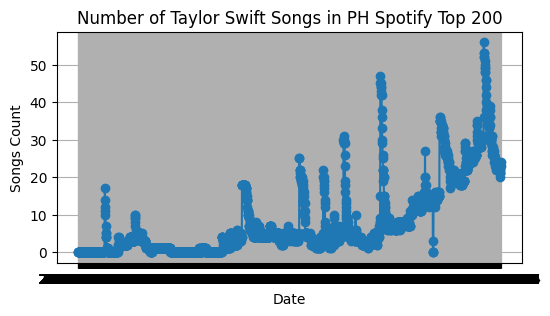

In [11]:
# Line: Date, plt, Count
plt.figure(figsize=(6,3))
plt.plot(df['date'], df['total_count'], marker='o', linestyle='-')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.grid(True)
plt.show()

# Problems:
# graph has a grey background
# x axis is blacked out

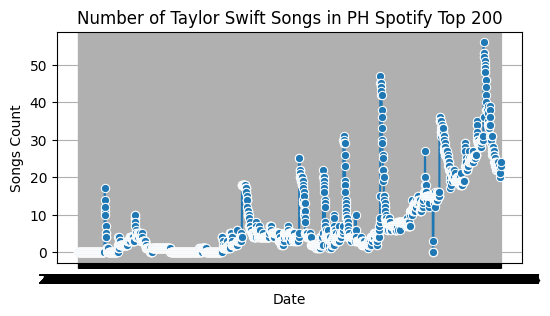

In [12]:
# Line: Date, sns, Count
plt.figure(figsize=(6,3))
sns.lineplot(data=df, x='date', y='total_count', marker='o')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.grid(True)
plt.show()

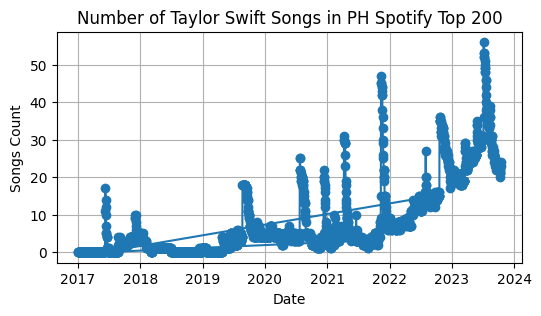

In [13]:
# Line: Datetime, plt, Count
plt.figure(figsize=(6,3))
plt.plot(df['date_time'], df['total_count'], marker='o', linestyle='-')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.grid(True)
plt.show()

# Problems:
# Weird lines going in different directions

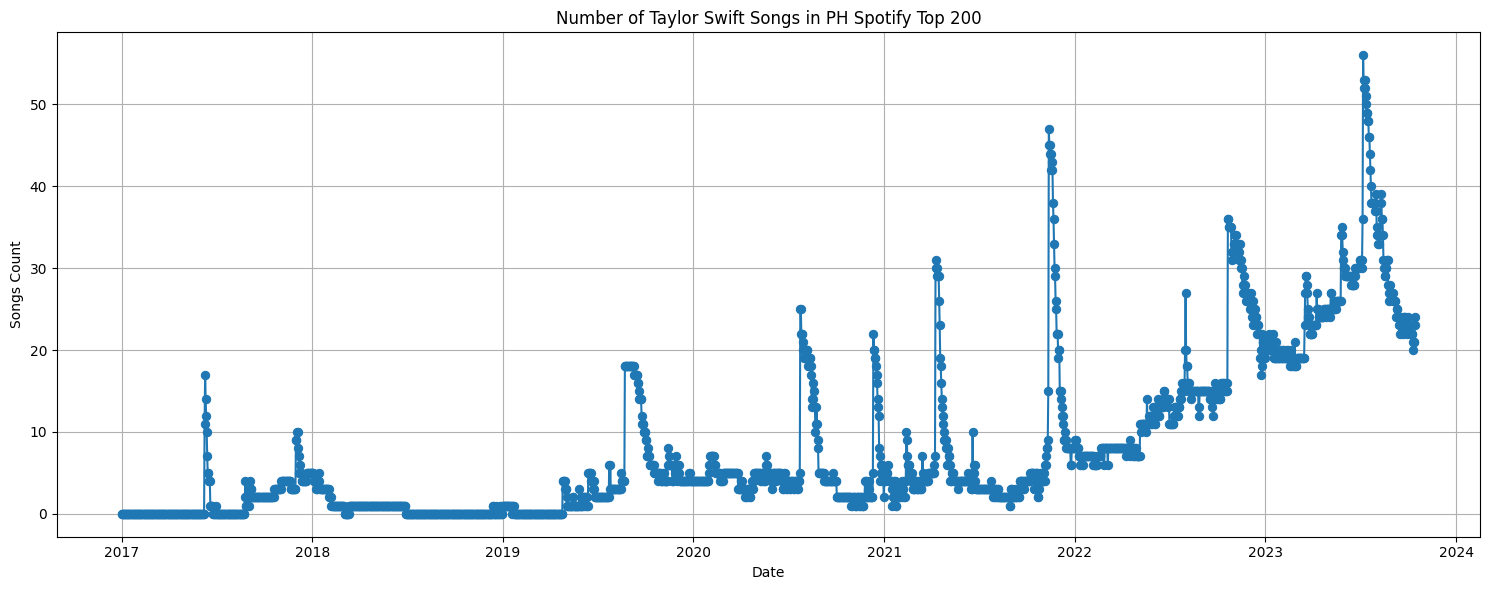

In [14]:
# Line: Datetime, sns, Count
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='date_time', y='total_count', marker='o', markeredgecolor=None)
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.tight_layout() # to prevent overlapping of marker points
plt.grid(True)
plt.show()

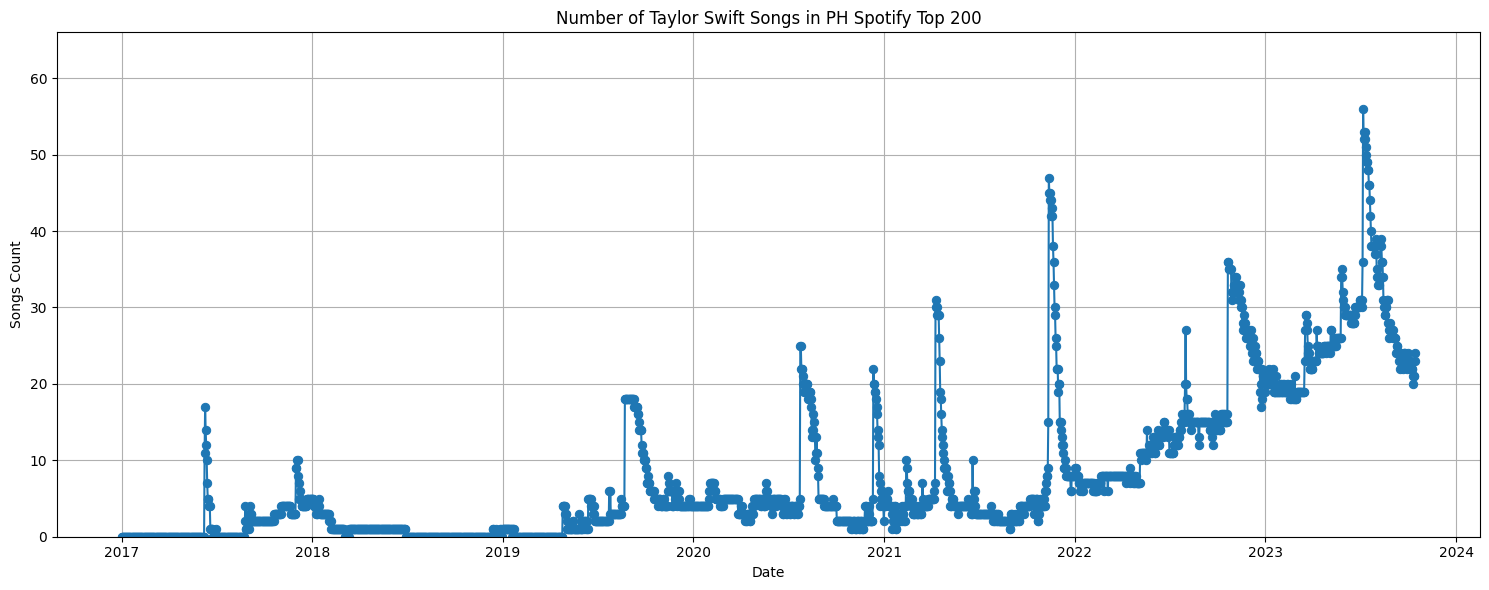

In [15]:
# Line: Datetime, sns, Count
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='date_time', y='total_count', marker='o', markeredgecolor=None)
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.tight_layout() # to prevent overlapping of marker points
plt.grid(True)

plt.ylim(0, df['total_count'].max() + 10)  # Adjust the upper limit if needed

plt.show()

## Daily Stream

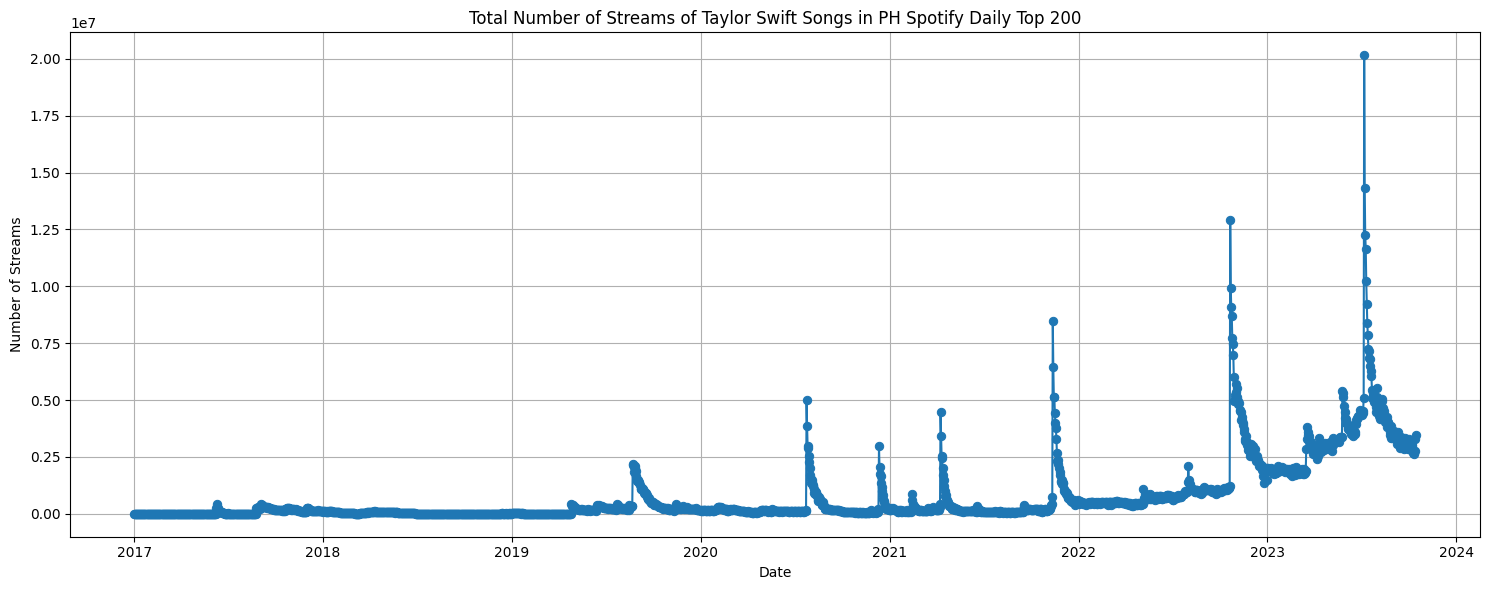

In [16]:
# Line: Datetime, sns, Streams
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='date_time', y='total_streams', marker='o', markeredgecolor=None)
plt.title('Total Number of Streams of Taylor Swift Songs in PH Spotify Daily Top 200')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.tight_layout() # to prevent overlapping of marker points
plt.grid(True)
plt.show()

# Data Cleaning


Checking Percent Change on the total stream

In [21]:
df['stream_percent_change'].value_counts()

stream_percent_change
 0.000000      493
 inf            11
-100.000000     10
 0.896807        1
-0.483002        1
              ... 
-1.158338        1
-11.221965       1
-3.137291        1
 1.762011        1
 5.683393        1
Name: count, Length: 1968, dtype: int64

There exists inf values due to limitations that only top 200 songs have the recorded stream. *To fix that, exchange inf to NaN*

In [22]:
# Replace 'inf' values with NaN
df['stream_percent_change'] = df['stream_percent_change'].replace(np.inf, np.nan)

# Convert the column to numeric data type
df['stream_percent_change'] = pd.to_numeric(df['stream_percent_change'])

# check if inf is gone
df['stream_percent_change'].value_counts()

stream_percent_change
 0.000000      493
-100.000000     10
 1.150611        1
-0.483002        1
-4.299148        1
              ... 
 7.659308        1
-1.158338        1
-11.221965       1
-3.137291        1
 5.683393        1
Name: count, Length: 1967, dtype: int64

Now, let's inspect the errors in percent change

In [28]:
df[df['date'].isin(['2022-09-16','2022-09-15'])]

,Unnamed: 0,date,total_streams,stream_percent_change,total_count,count_percent_change,highest_rank,top_rank_diff,date_time
2079,2079,2022-09-15,1057546,0.416652,15,0.000000,43.0,2.0,2022-09-15
2084,2084,2022-09-16,971098,836.196591,14,366.666667,53.0,-58.0,2022-09-16


The stream_percent_change in 2022-09-16 is incorrect, it should just be negative

In [31]:
df[df['date'].isin(['2022-09-16','2022-09-15'])]

,Unnamed: 0,date,total_streams,stream_percent_change,total_count,count_percent_change,highest_rank,top_rank_diff,date_time
2079,2079,2022-09-15,1057546,0.416652,15,0.000000,43.0,2.0,2022-09-15
2084,2084,2022-09-16,971098,836.196591,14,366.666667,53.0,-58.0,2022-09-16


In [34]:
df.iloc[2079:2084 + 1]

,Unnamed: 0,date,total_streams,stream_percent_change,total_count,count_percent_change,highest_rank,top_rank_diff,date_time
2079,2079,2022-09-15,1057546,0.416652,15,0.000000,43.0,2.0,2022-09-15
2080,2080,2017-05-30,0,-100.000000,0,-100.000000,NaN,0.0,2017-05-30
2081,2081,2017-05-31,0,NaN,0,0.000000,NaN,0.0,2017-05-31
2082,2082,2017-06-02,0,NaN,0,0.000000,NaN,0.0,2017-06-02
2083,2083,2021-06-25,103728,inf,3,inf,111.0,0.0,2021-06-25
2084,2084,2022-09-16,971098,836.196591,14,366.666667,53.0,-58.0,2022-09-16


This is due to the incorrect arrangement of the values not being sorted by date. To fix it, let's sort it out

In [35]:
df.sort_values(by='date', inplace=True)

In [36]:
# Get the percent change of the daily streams
df['stream_percent_change'] = df['total_streams'].pct_change()*100

In [39]:
df[df['date'].isin(['2022-09-16','2022-09-15'])]

,Unnamed: 0,date,total_streams,stream_percent_change,total_count,count_percent_change,highest_rank,top_rank_diff,date_time
2079,2079,2022-09-15,1057546,0.416652,15,0.000000,43.0,2.0,2022-09-15
2084,2084,2022-09-16,971098,-8.174396,14,-6.666667,53.0,-58.0,2022-09-16


Do the computation again for the sorted values

In [38]:
df['count_percent_change'] = df['total_count'].pct_change()*100

In [40]:
df['top_rank_diff'] = df['highest_rank'].diff()

In [41]:
df[df['date'].isin(['2022-09-16','2022-09-15'])]

,Unnamed: 0,date,total_streams,stream_percent_change,total_count,count_percent_change,highest_rank,top_rank_diff,date_time
2079,2079,2022-09-15,1057546,0.416652,15,0.000000,43.0,2.0,2022-09-15
2084,2084,2022-09-16,971098,-8.174396,14,-6.666667,53.0,10.0,2022-09-16


In [46]:
# Replace 'inf' values with NaN
df['stream_percent_change'] = df['stream_percent_change'].replace(np.inf, np.nan)
df['count_percent_change'] = df['count_percent_change'].replace(np.inf, np.nan)
df['top_rank_diff'] = df['top_rank_diff'].replace(np.inf, np.nan)

# Convert the column to numeric data type
df['stream_percent_change'] = pd.to_numeric(df['stream_percent_change'])
df['count_percent_change'] = pd.to_numeric(df['count_percent_change'])
df['top_rank_diff'] = pd.to_numeric(df['top_rank_diff'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2479 entries, 0 to 2478
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2479 non-null   int64         
 1   date                   2479 non-null   object        
 2   total_streams          2479 non-null   int64         
 3   stream_percent_change  1975 non-null   float64       
 4   total_count            2479 non-null   int64         
 5   count_percent_change   1975 non-null   float64       
 6   highest_rank           1976 non-null   float64       
 7   top_rank_diff          1966 non-null   float64       
 8   date_time              2479 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 193.7+ KB


In [48]:
df.to_csv("ph_spotify_daily_charts_ts_summary_clean.csv")